In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
datafile1 = 'D600 Task 1, 2 and 3 Dataset Housing Information.csv'
df = pd.read_csv(datafile1)
#rwad csv file into frame

In [3]:
df.dtypes

ID                         int64
Price                    float64
SquareFootage            float64
NumBathrooms               int64
NumBedrooms                int64
BackyardSpace            float64
CrimeRate                float64
SchoolRating               int64
AgeOfHome                float64
DistanceToCityCenter     float64
EmploymentRate           float64
PropertyTaxRate          float64
RenovationQualityRate      int64
LocalAmenities             int64
TransportAccess            int64
Fireplace                 object
HouseColor                object
Garage                    object
Floors                     int64
Windows                    int64
PreviousSalePrice        float64
IsLuxury                   int64
dtype: object

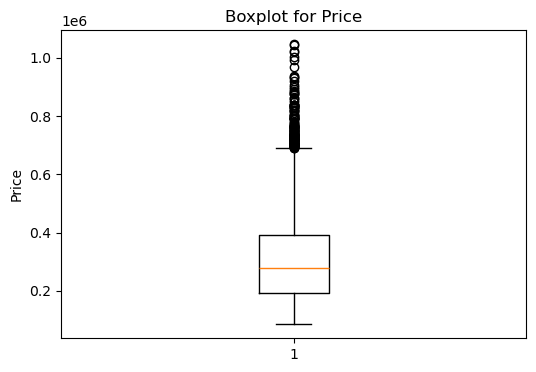

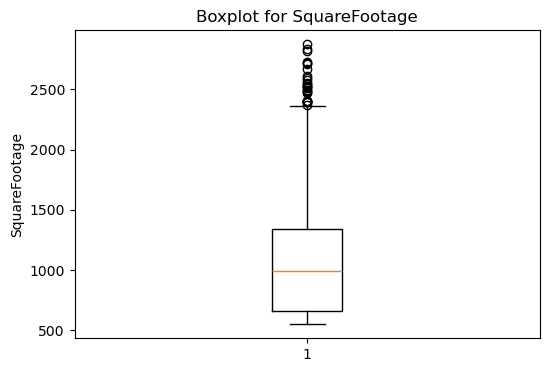

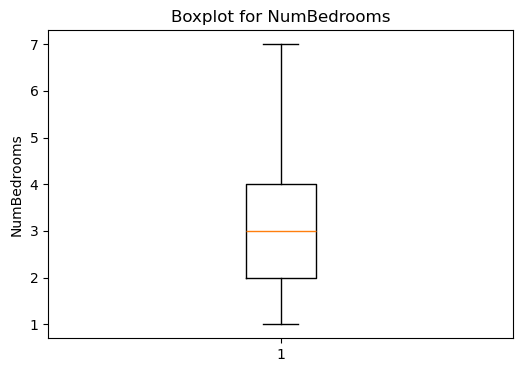

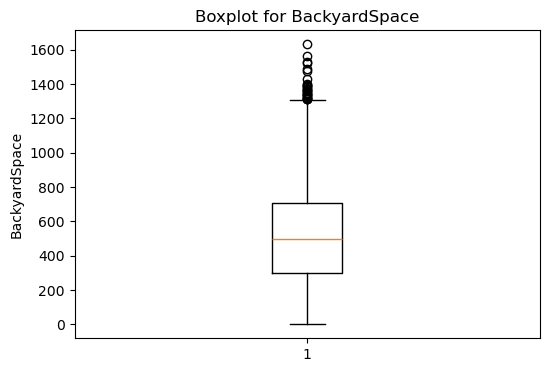

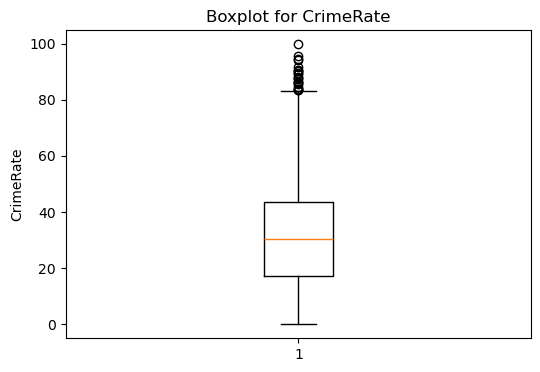

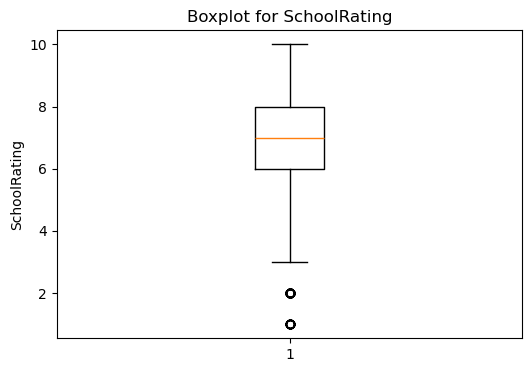

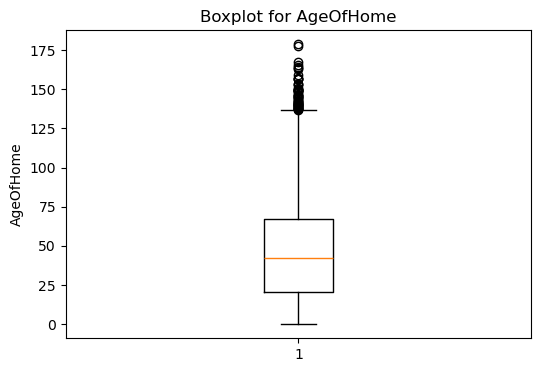

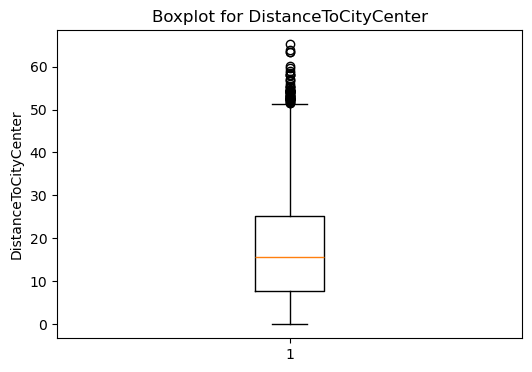

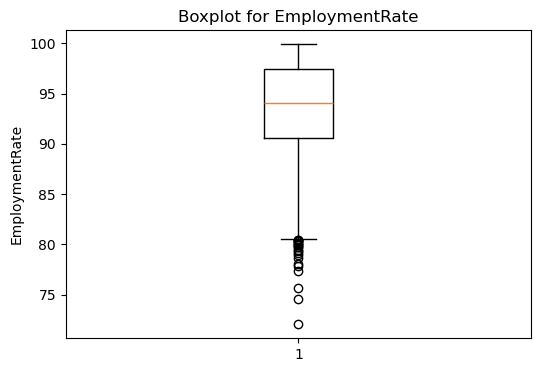

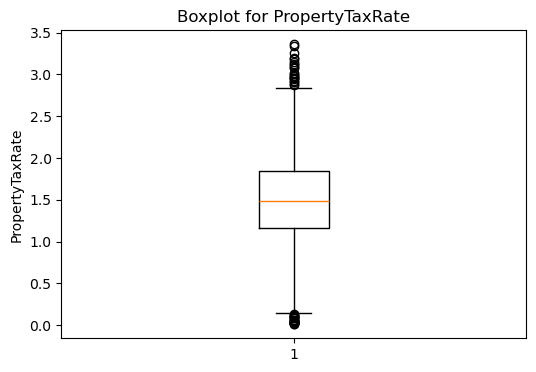

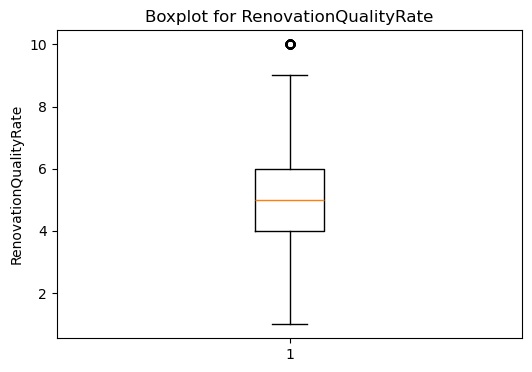

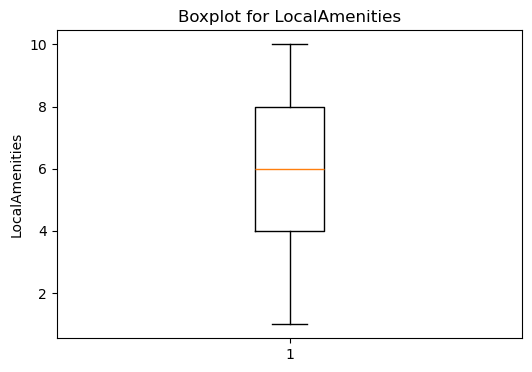

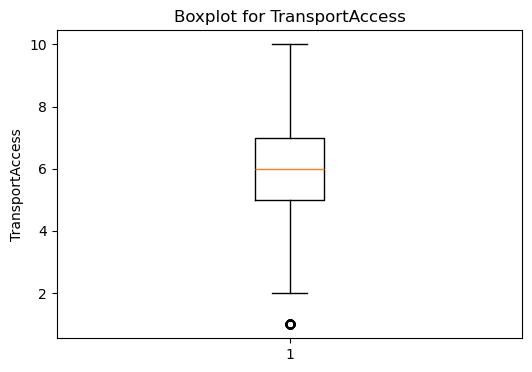

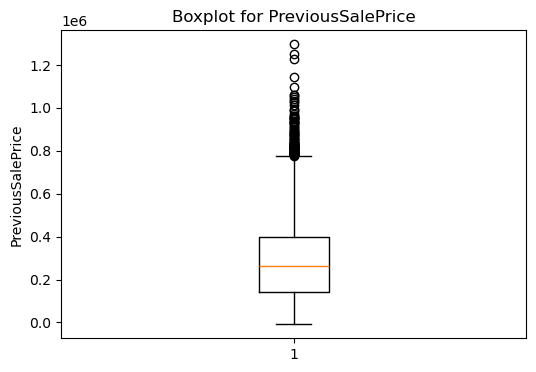

In [4]:
import matplotlib.pyplot as plt
variab = [
    "Price", "SquareFootage", "NumBedrooms", "BackyardSpace",  "CrimeRate", "SchoolRating", "AgeOfHome", "DistanceToCityCenter",
    "EmploymentRate", "PropertyTaxRate",  "RenovationQualityRate", "LocalAmenities", "TransportAccess", "PreviousSalePrice"]
for col in variab:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col])
    plt.title(f"Boxplot for {col}")
    plt.ylabel(f"{col}")
    plt.show()
#Univariate visual




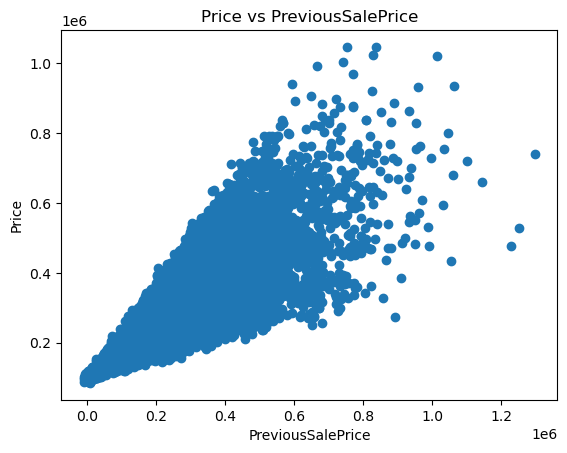

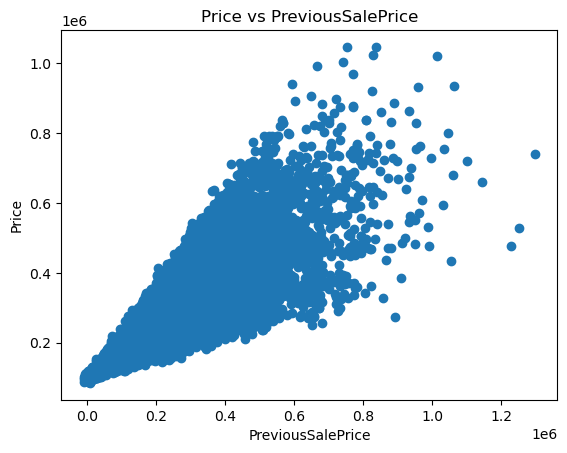

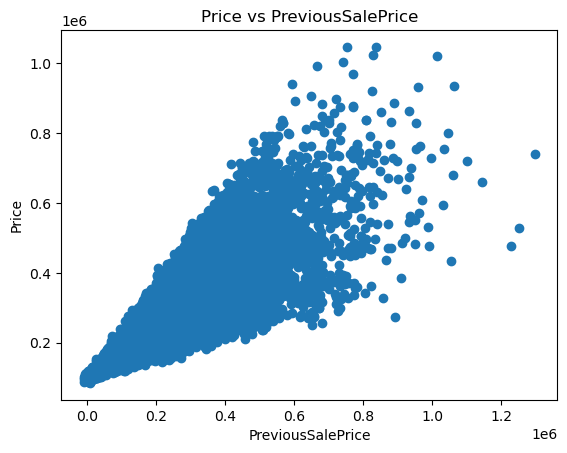

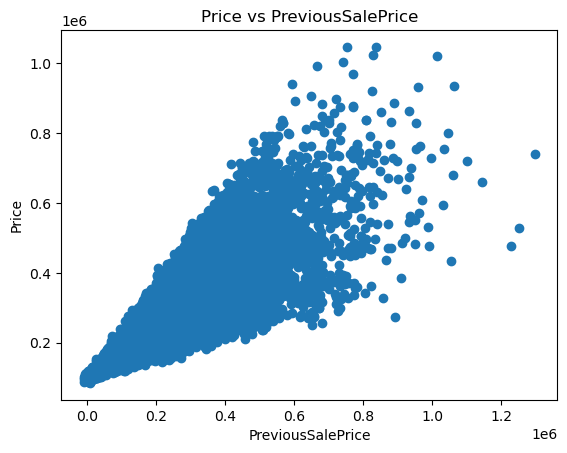

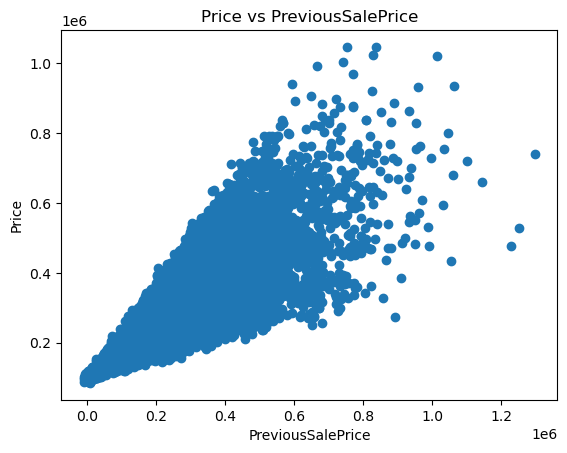

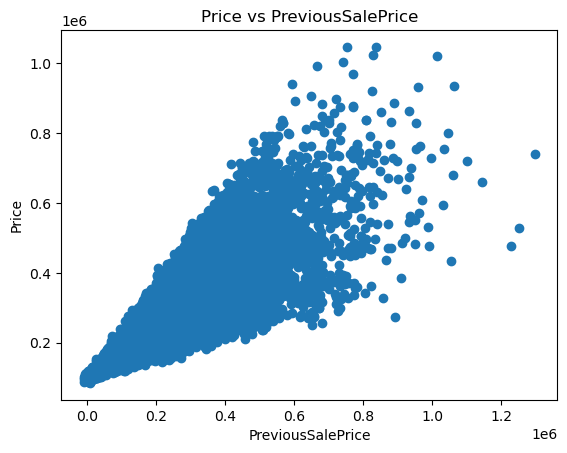

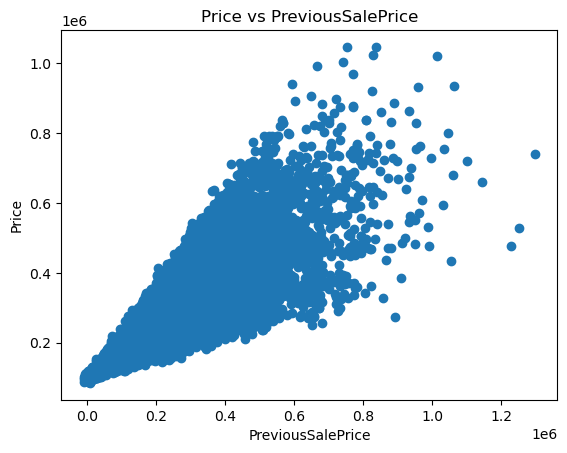

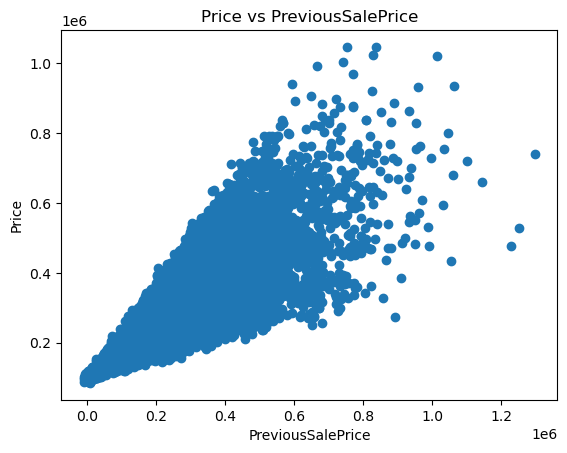

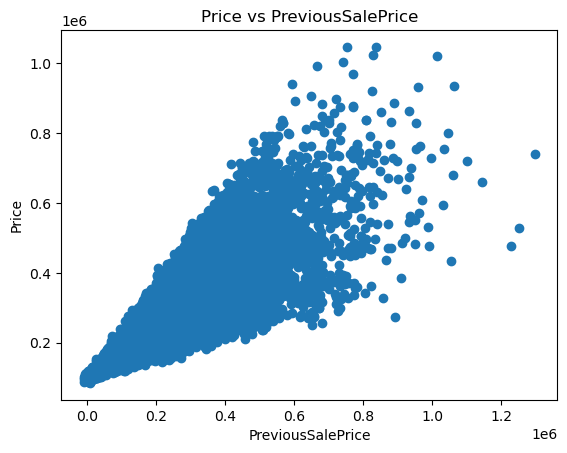

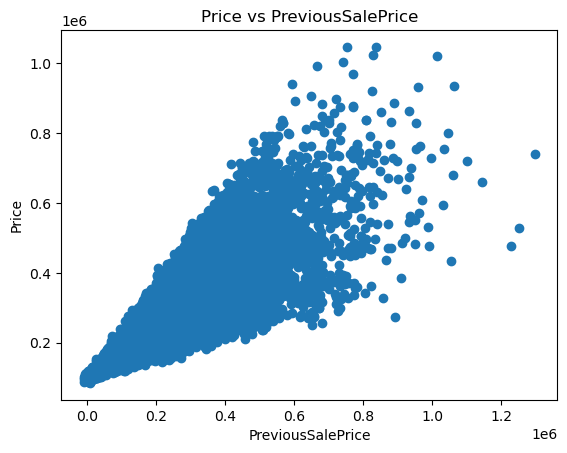

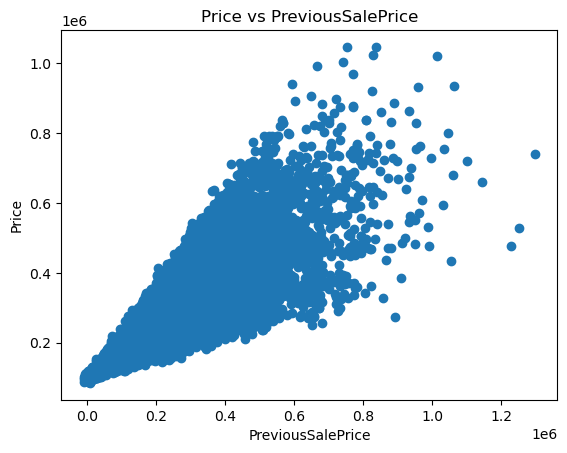

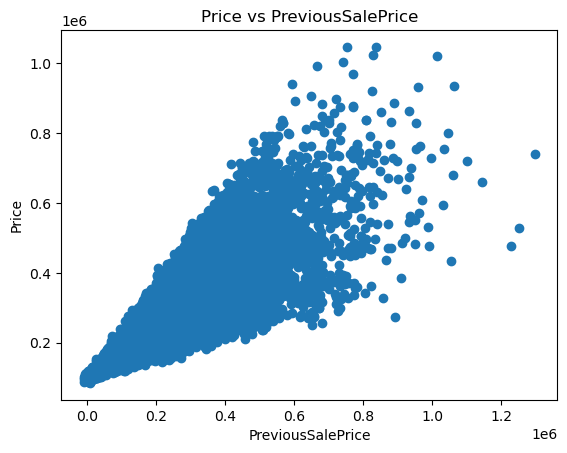

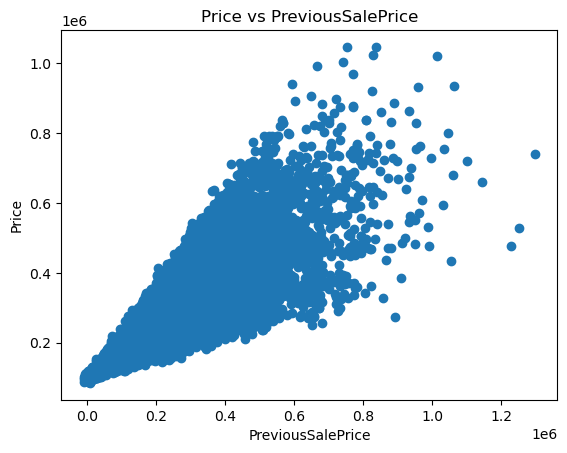

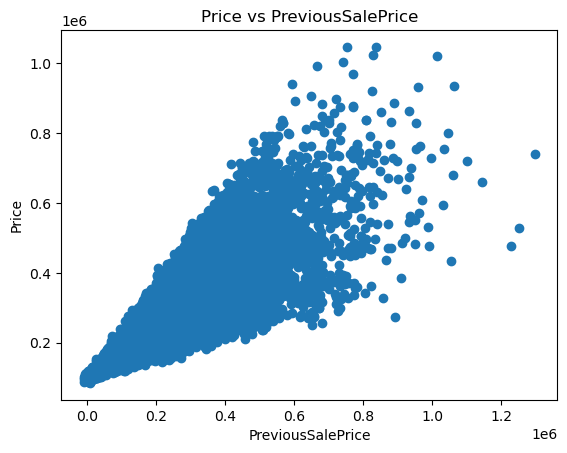

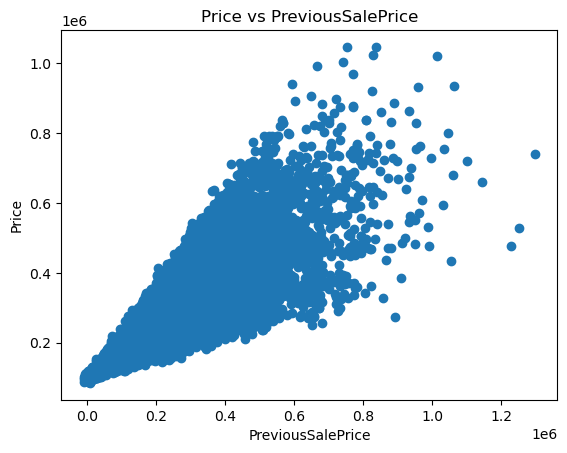

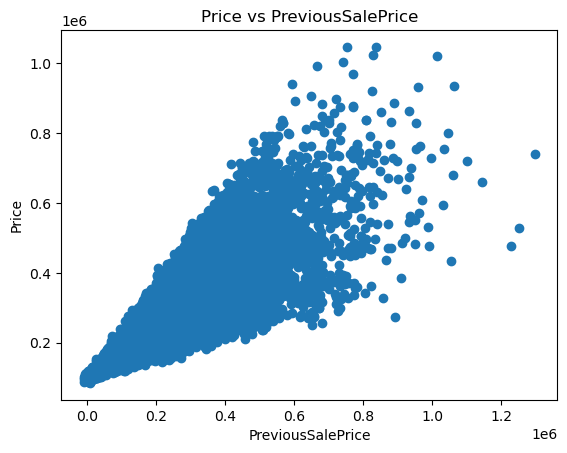

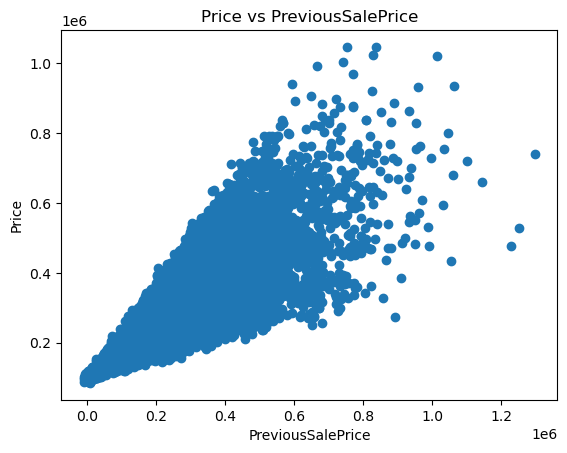

In [5]:
variab = [
    "Price", "SquareFootage", "NumBedrooms", "BackyardSpace",  "CrimeRate", "SchoolRating", "AgeOfHome", "DistanceToCityCenter",
    "EmploymentRate", "PropertyTaxRate",  "RenovationQualityRate", "LocalAmenities", "TransportAccess", "PreviousSalePrice"]
for variab in col:
    plt.figure()
    plt.scatter(df[col], df["Price"])
    plt.title(f"Price vs {col}")
    plt.xlabel(col)
    plt.ylabel("Price")
    plt.show()

#Biivariate visual


In [6]:
df.isnull().sum()
#Check for missing values

ID                       0
Price                    0
SquareFootage            0
NumBathrooms             0
NumBedrooms              0
BackyardSpace            0
CrimeRate                0
SchoolRating             0
AgeOfHome                0
DistanceToCityCenter     0
EmploymentRate           0
PropertyTaxRate          0
RenovationQualityRate    0
LocalAmenities           0
TransportAccess          0
Fireplace                0
HouseColor               0
Garage                   0
Floors                   0
Windows                  0
PreviousSalePrice        0
IsLuxury                 0
dtype: int64

In [38]:
vari = [
    "Price", "SquareFootage", "NumBedrooms", "BackyardSpace",  "CrimeRate", "SchoolRating", "AgeOfHome", "DistanceToCityCenter",
    "EmploymentRate", "PropertyTaxRate",  "RenovationQualityRate", "LocalAmenities", "TransportAccess", "PreviousSalePrice"]
df[vari].describe()

#stats for columns

,Price,SquareFootage,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,EmploymentRate,PropertyTaxRate,RenovationQualityRate,LocalAmenities,TransportAccess,PreviousSalePrice
count,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7.000000e+03
mean,3.072820e+05,1048.947459,3.008571,511.507029,31.226194,6.949571,46.797046,17.475337,93.711349,1.500437,5.016857,5.962143,5.988857,2.845094e+05
std,1.501734e+05,426.010482,1.021940,279.926549,18.025327,1.909931,31.779701,12.024985,4.505359,0.498591,1.974766,2.641805,1.970896,1.857340e+05
min,8.500000e+04,550.000000,1.000000,0.390000,0.030000,1.000000,0.010000,0.000000,72.050000,0.010000,1.000000,1.000000,1.000000,-8.356902e+03
25%,1.921075e+05,660.815000,2.000000,300.995000,17.390000,6.000000,20.755000,7.827500,90.620000,1.160000,4.000000,4.000000,5.000000,1.420140e+05
50%,2.793230e+05,996.320000,3.000000,495.965000,30.385000,7.000000,42.620000,15.625000,94.010000,1.490000,5.000000,6.000000,6.000000,2.621831e+05
75%,3.918781e+05,1342.292500,4.000000,704.012500,43.670000,8.000000,67.232500,25.222500,97.410000,1.840000,6.000000,8.000000,7.000000,3.961212e+05
max,1.046676e+06,2874.700000,7.000000,1631.360000,99.730000,10.000000,178.680000,65.200000,99.900000,3.360000,10.000000,10.000000,10.000000,1.296607e+06


In [11]:
independent_vars = [
    "CrimeRate", "SquareFootage", "BackyardSpace", "DistanceToCityCenter", "PreviousSalePrice"
]

df = df.copy()
for var in independent_vars:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[var] = df[var].clip(round(lower_bound, 2), round(upper_bound, 2))

#Outlier mitigation
    


In [12]:
df
#checking dataset for updated values

,ID,Price,SquareFootage,NumBathrooms,NumBedrooms,BackyardSpace,CrimeRate,SchoolRating,AgeOfHome,DistanceToCityCenter,...,RenovationQualityRate,LocalAmenities,TransportAccess,Fireplace,HouseColor,Garage,Floors,Windows,PreviousSalePrice,IsLuxury
0,1,176391.7665,1002.49,1,2,354.22,44.61,8,106.01,26.79,...,3,6,4,No,Green,Yes,1,0,165208.58650,0
1,2,402358.3158,897.55,5,3,579.57,41.05,6,13.77,24.40,...,5,6,4,No,White,No,1,17,524019.64430,0
2,3,124287.4584,774.63,2,1,1114.67,49.10,8,22.59,8.74,...,6,6,6,Yes,Yellow,No,1,15,76449.70980,0
3,4,396428.1539,550.00,1,4,561.07,29.17,7,104.06,2.94,...,7,6,6,Yes,White,No,1,10,491021.51710,0
4,5,208725.8216,614.91,2,2,782.71,63.76,8,22.15,15.01,...,4,4,6,No,Blue,No,2,28,142189.92140,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,6996,473382.5348,1026.36,2,5,149.31,0.10,9,31.79,11.59,...,5,7,3,No,Green,No,1,13,380555.49390,1
6996,6997,104773.5017,550.00,1,3,420.78,41.66,3,128.40,50.45,...,1,1,3,No,White,Yes,2,26,22636.84356,0
6997,6998,343397.9756,2218.22,1,4,526.81,11.18,9,15.21,3.96,...,5,8,6,No,Blue,Yes,1,10,442610.31710,0
6998,6999,151679.9536,888.38,2,1,594.27,43.99,4,32.41,33.17,...,1,1,4,No,Green,No,1,25,152533.66470,0


In [13]:
df1 = df[[
    "Price", "SquareFootage", "NumBedrooms", "BackyardSpace",  "CrimeRate", "SchoolRating", "AgeOfHome", "DistanceToCityCenter",
    "EmploymentRate", "PropertyTaxRate",  "RenovationQualityRate", "LocalAmenities", "TransportAccess", "PreviousSalePrice"]]
    #dafatframe to use for ana

In [14]:
df1.shape
#checking the size of the dataset

(7000, 14)

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


# Define dependent and independent variables
X = df1[[
    "CrimeRate", "SchoolRating", "EmploymentRate", "LocalAmenities",
    "TransportAccess", "SquareFootage", "BackyardSpace",
    "RenovationQualityRate", "DistanceToCityCenter",
    "PropertyTaxRate", "NumBedrooms", "PreviousSalePrice", "AgeOfHome"
]]

y = df1["Price"]

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42
) 



X_train_const = sm.add_constant(X_train) #adds intercept for baseline predictors to have 0 starting point to train subset
X_test_const  = sm.add_constant(X_test) #adds intercept for baseline predictors to have 0 starting point to test subset
#model = LinearRegression()

#model.fit(X_train, y_train)
ols_model = sm.OLS(y_train, X_train_const).fit() #defines OLS linear logistics model, then trains model with .fit 
print(ols_model.summary()) #prints  statsmodel output for model coefficients and other 

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     990.4
Date:                Thu, 19 Feb 2026   Prob (F-statistic):               0.00
Time:                        00:28:21   Log-Likelihood:                -71351.
No. Observations:                5600   AIC:                         1.427e+05
Df Residuals:                    5586   BIC:                         1.428e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  7.213e+

In [16]:
X_train.to_csv("X-Training.csv", index = False)
X_test.to_csv("X-Test.csv", index = False)
y_train.to_csv("y-Training.csv", index = False)
y_test.to_csv("y-Test.csv", index = False)
#exporting datasets to csv

In [17]:
print(y)
#making sure price is same as expected to use later

0       176391.7665
1       402358.3158
2       124287.4584
3       396428.1539
4       208725.8216
           ...     
6995    473382.5348
6996    104773.5017
6997    343397.9756
6998    151679.9536
6999    438060.8193
Name: Price, Length: 7000, dtype: float64


In [23]:
import statsmodels.api as sm


def backward_elimination(X, y, significance_level=0.05): #method passes with listed parameters
    ordered_removal = []
    X_opt = X.copy()
    
    
    while True: #while loop to run through variables

        X_const = sm.add_constant(X_opt) # Adds intercepts to X passed in variable
        optimized_model = sm.OLS(y, X_const).fit() # defines logistic model then trains model with .fitX_opt = X.copy()
        p_values = optimized_model.pvalues.drop("const") #drops constantant in the model , so does not involve it in removal 
        max_p = p_values.max() # gets highest p_value in model
        if max_p > significance_level: # if the variable with highest p_value is greater than significance_level=0.05 then runs
            remove_var = p_values.idxmax() # assign the highest p_value id to remove_var variable
            ordered_removal.append(remove_var) #Adding the variable value(highest p_value that is being removed) to list
            X_opt = X_opt.drop(columns=[remove_var]) #removing the column with provided name
            
        else: # if all p_value left are not greater than significance_level
            break #breaks out of while loop
    i = 0
    for i, var in enumerate(ordered_removal, start=1):
        print(f"Removal Number {i} {var}")
    return optimized_model, X_opt, ordered_removal



optimized_model, X_train_optimized, ordered_removal  = backward_elimination(X_train, y_train) # calling function to pass X variables and y dependent

print(optimized_model.summary()) #print summary of the optimized model
predictors = optimized_model.model.exog_names # Getting names of predictors in model
eq = ""
for name, coef in optimized_model.params.items():
   if name == "const":
       eq +=f"{coef:.4f}"
   else:
       eq +=f"+ {coef:.4f}({name}) "
print(eq)

Removal Number 1 EmploymentRate
Removal Number 2 SchoolRating
Removal Number 3 CrimeRate
Removal Number 4 BackyardSpace
Removal Number 5 LocalAmenities
Removal Number 6 TransportAccess
Removal Number 7 AgeOfHome
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2145.
Date:                Thu, 19 Feb 2026   Prob (F-statistic):               0.00
Time:                        00:47:06   Log-Likelihood:                -71355.
No. Observations:                5600   AIC:                         1.427e+05
Df Residuals:                    5593   BIC:                         1.428e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                        

In [24]:
print("R-squared:", optimized_model.rsquared)
print("Adjusted R-squared:", optimized_model.rsquared_adj)
print("F-statistic:", optimized_model.fvalue)
print("Prob (F-statistic):", optimized_model.f_pvalue)
print("\nCoefficients:")
print(optimized_model.params)
print("\nP-values:")
print(optimized_model.pvalues)
# printing values from optimization

R-squared: 0.6970228048126366
Adjusted R-squared: 0.6966977801083412
F-statistic: 2144.5225412131786
Prob (F-statistic): 0.0

Coefficients:
const                    56960.433902
SquareFootage               40.443389
RenovationQualityRate     4437.115435
DistanceToCityCenter      -315.977349
PropertyTaxRate          -4793.323065
NumBedrooms              13226.507026
PreviousSalePrice            0.562373
dtype: float64

P-values:
const                    8.798961e-19
SquareFootage            4.819077e-32
RenovationQualityRate    2.582506e-11
DistanceToCityCenter     9.678166e-04
PropertyTaxRate          3.399618e-02
NumBedrooms              1.262998e-23
PreviousSalePrice        0.000000e+00
dtype: float64


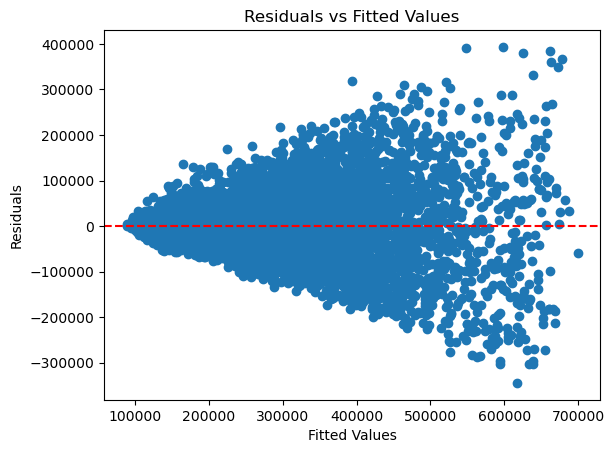

In [28]:
import seaborn as sns
# Linearity test
# Get predictions and residuals
y_pred = optimized_model.predict(sm.add_constant(X_train_optimized))
residuals = y_train - y_pred

# Residual vs Fitted plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


In [26]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
# Homoscedasticity
# Breusch-Pagan test done to validate Homoscedasticity
bp_test = sms.het_breuschpagan(residuals, sm.add_constant(X_train_optimized))
labels = ['Lagrange multiplier statistic', 'p-value', 
          'f-value', 'f p-value']
print(lzip(labels, bp_test))


[('Lagrange multiplier statistic', np.float64(1424.979400596895)), ('p-value', np.float64(6.36910308715754e-297)), ('f-value', np.float64(146.6586026291753)), ('f p-value', np.float64(0.0))]


In [40]:


X_test_optimized = X_test[X_train_optimized.columns]

X_test_const = sm.add_constant(X_test_optimized, has_constant="add")

y_pred = optimized_model.predict(X_test_const)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("(RMSE):", rmse)

#Calculating Root mean squared erro


(RMSE): 85175.78439886557


In [ ]:
df.to_csv("Cleaned_data.csv", index=False )
#exporting clean dataset